# Review of Matplotlib for Charts and Figures

This tutorial covers some basic usage patterns and best-practices to help you get started with Matplotlib.

In [1]:
# use this line to include output matplotlib graphs in your notebook, next to the code.
%matplotlib inline

# A review of Matplotlib

A good start of this library: https://matplotlib.org/3.3.3/tutorials/index.html


Matplotlib’s main object is a comprehensive library for creating static, animated, and interactive visualizations in Python. It can:

* Create -
Develop publication quality plots with just a few lines of code.
Use interactive figures that can zoom, pan, update...

* Customize -
Take full control of line styles, font properties, axes properties...
Export and embed to a number of file formats and interactive environments.

* Extend -
Explore tailored functionality provided by third party packages.
Learn more about Matplotlib through the many external learning resources.

In [2]:
# import necessary libraries
import matplotlib.pyplot as plt # import plotting functions
import numpy as np # import array functions

**Let's take a look at a simple examples of Matplotlib.**

Matplotlib graphs your data on `Figure` (i.e., windows, Jupyter
widgets, etc.), each of which can contain one or more `Axes` (i.e., an
area where points can be specified in terms of x-y coordinates (or theta-r
in a polar plot, or x-y-z in a 3D plot, etc.).  The most simple way of
creating a figure with an axes is using `pyplot.subplots`. We can then use
`Axes.plot` to draw some data on the axes:


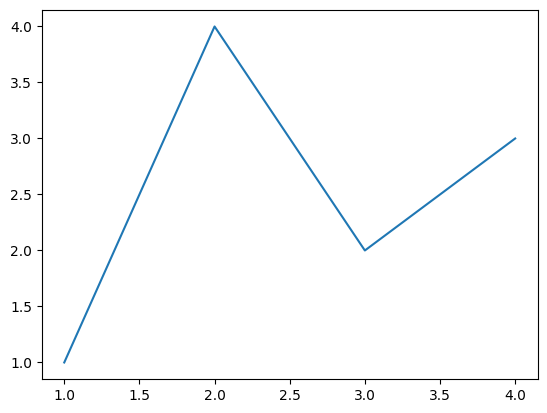

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Many other plotting libraries or languages do not require you to explicitly
create an axes.  For example, in MATLAB, one can just do:

> plot([1, 2, 3, 4], [1, 4, 2, 3])  

and get the desired graph.

In fact, you can do the same in Matplotlib: for each `Axes` graphing
method, there is a corresponding function in the `matplotlib.pyplot`
module that performs that plot on the "current" axes, creating that axes (and
its parent figure) if they don't exist yet.  So the previous example can be
written more shortly as

> plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

## Parts of a Figure

Now, let's have a deeper look at the components of a Matplotlib figure.

![](anatomy.png)

**(1) Figure**

The **whole** figure.  The figure keeps
track of all the child `matplotlib.axes.Axes`, a smattering of
'special' artists (titles, figure legends, etc), and the **canvas**.
A figure can contain any
number of `matplotlib.axes.Axes`, but will typically have
at least one.

The easiest way to create a new figure is with pyplot::

In [4]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 640x480 with 0 Axes>

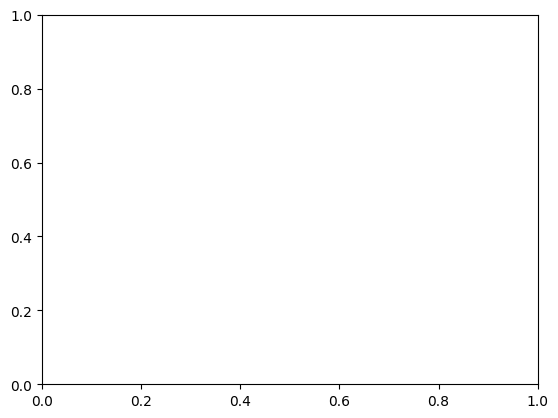

In [5]:
fig, ax = plt.subplots()  # a figure with a single Axes

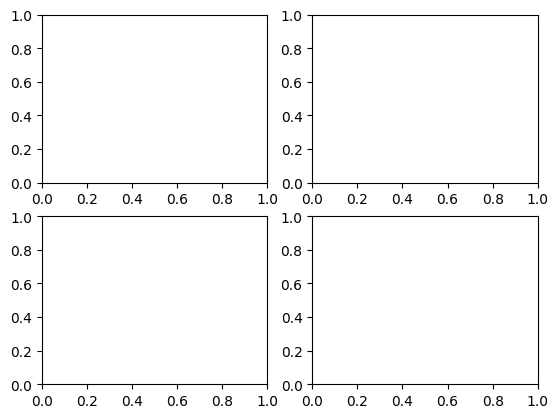

In [6]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It's convenient to create the axes together with the figure, but you can
also add axes later on, allowing for more complex axes layouts.

**(2) Axes**

This is what you think of as 'a plot', it is the region of the image
with the data space. A given figure
can contain many Axes, but a given `Axes`
object can only be in one `Figure`.  The
Axes contains two (or three in the case of 3D)
`Axis` objects (be aware of the difference
between **Axes** and **Axis**) which take care of the data limits (the
data limits can also be controlled via the `axes.Axes.set_xlim` and
`axes.Axes.set_ylim` methods).  Each `Axes` has a title
(set via `set_title`), an x-label (set via
`set_xlabel`), and a y-label set via
`set_ylabel`).

The `Axes` class and its member functions are the primary entry
point to working with the OO interface.


**(3) Axis**

These are the number-line-like objects. They take
care of setting the graph limits and generating the ticks (the marks
on the axis) and ticklabels (strings labeling the ticks).  The location of
the ticks is determined by a `Locator` object and the
ticklabel strings are formatted by a `Formatter`.  The
combination of the correct `Locator` and `Formatter` gives very fine
control over the tick locations and labels.


**(4) Artist**

Basically everything you can see on the figure is an artist (even the
`Figure`, `Axes`, and `Axis` objects).  This includes
`Text` objects, `Line2D` objects, `collections` objects, `Patch`
objects ... (you get the idea).  When the figure is rendered, all of the
artists are drawn to the **canvas**.  Most Artists are tied to an Axes; such
an Artist cannot be shared by multiple Axes, or moved from one to another.

## The object-oriented interface and the pyplot interface

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the
  "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and
  use pyplot functions for plotting.

So one can do (OO-style)

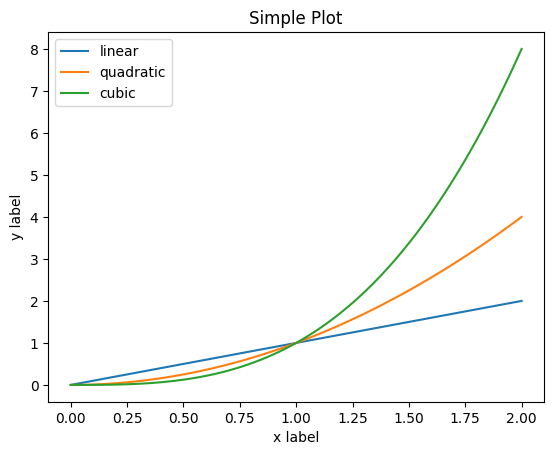

In [7]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or (pyplot-style)

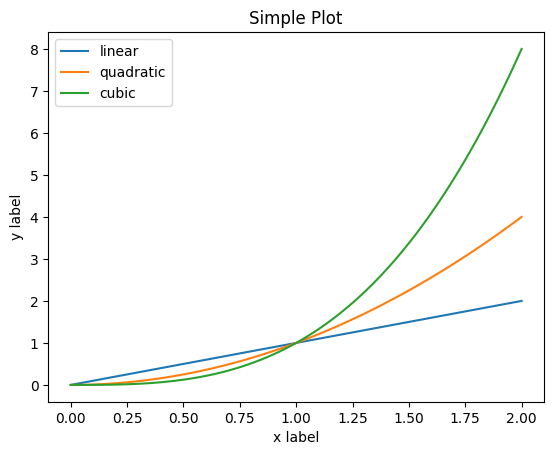

In [8]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Matplotlib's documentation and examples use both the OO and the pyplot approaches (which are equally powerful), and you should feel free to use either (however, it is preferable pick one of them and stick to it, instead of mixing them). In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project).


##  Using the helper function code style

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

In [9]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use as:

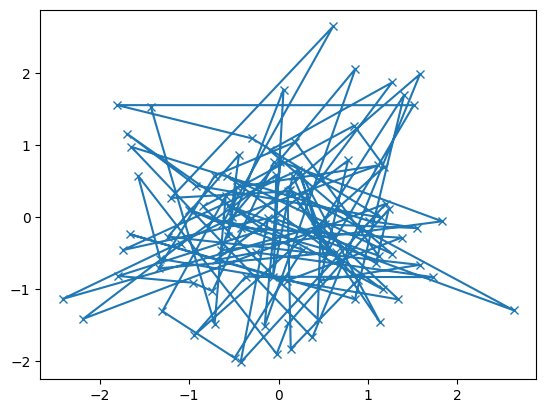

In [10]:
data1, data2 = np.random.randn(2, 100) # prepare the inputs: just some random data
fig, ax = plt.subplots(1, 1) # set the layout
my_plotter(ax, data1, data2, {'marker': 'x'}) # call the function to make a graph

## Choosing Colormaps in Matplotlib

Matplotlib has a number of built-in colormaps accessible via matplotlib.cm.get_cmap

First, let us define a helper function that takes one of more colormaps as input, creates some random data and applies the colormap(s) to an image plot of that dataset.

In [11]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(8000)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In the simplest case we might type in a list of color names to create a colormap from those.

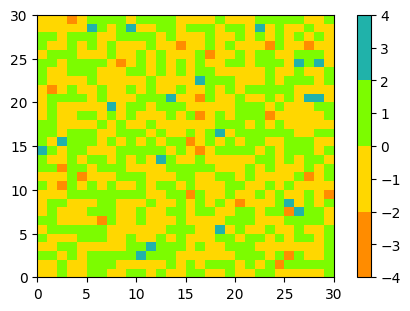

In [12]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

## Visualize multi-dimentional data

n-dimensional dataset: Wine

We will be working with the Wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine). I selected this dataset because it has three classes of points and a thirteen-dimensional feature set, yet is still fairly small.

In [13]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']
wines = pd.read_csv(url, names=cols) # fetch the data and name the columns

y = wines['Class']          # Split off classifications
X = wines.loc[:, 'Alcohol':] # Split off features


In [14]:
wines

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [16]:
X

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Method 1: Visualizing data in one dimension (1-D)

One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using `pandas`.

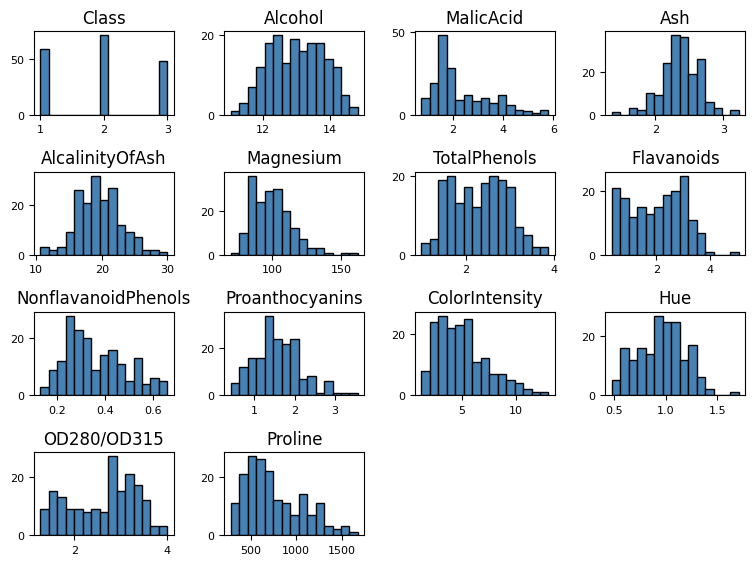

In [17]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Method 2: two-dimensional

A simple approach to visualizing multi-dimensional data is to select two (or three) dimensions and plot the data as seen in that plane. For example, I could plot the Flavanoids vs. Nonflavanoid Phenols plane as a two-dimensional “slice” of the original dataset:

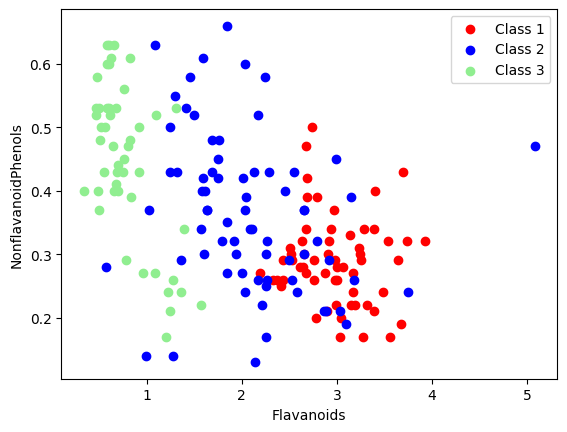

In [18]:
# three different scatter series so the class labels in the legend are distinct
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label='Class 1', c='red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label='Class 2', c='blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

# display
plt.show()

### Method 3: three-dimensional

Let’s look at strategies for visualizing three continuous, numeric attributes. One way would be to have two dimensions represented as the regular length (x-axis)and breadth (y-axis) and also take the notion of depth (z-axis) for the third dimension.

Text(0.5, 0, 'Alcohol')

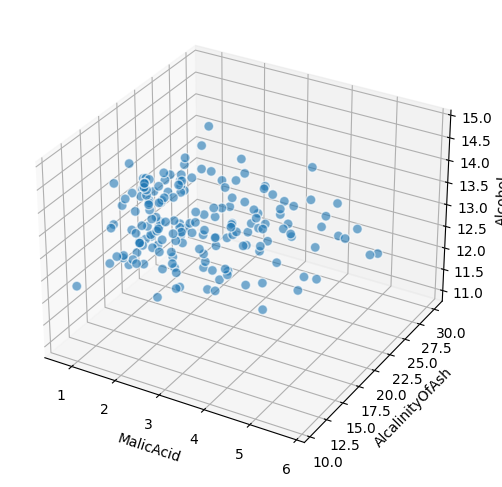

In [19]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['MalicAcid']
ys = wines['AlcalinityOfAsh']
zs = wines['Alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('MalicAcid')
ax.set_ylabel('AlcalinityOfAsh')
ax.set_zlabel('Alcohol')

### Method 4: four-dimensional

Based on our discussion earlier, we leverage various components of the charts visualize multiple dimensions.

Text(0.5, 0, 'Alcohol')

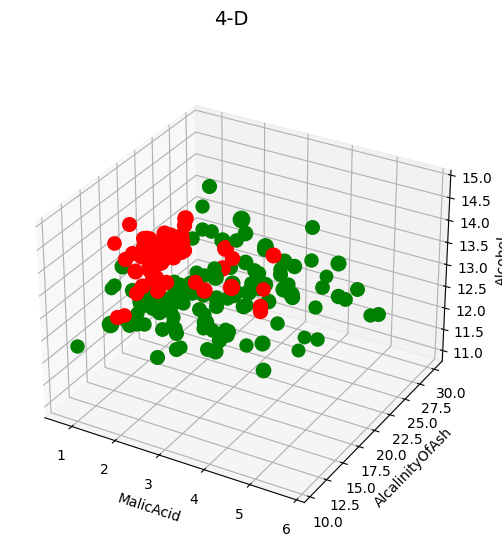

In [20]:
# Visualizing 4-D mix data using scatter plots
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('4-D', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = wines['MalicAcid']
ys = wines['AlcalinityOfAsh']
zs = wines['Alcohol']
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
wines['Colors'] = ['red' if wt == 1 else 'green' for wt in wines['Class']]
cs = wines['Colors'] # color
ss = wines['Magnesium'] # size

for x,y,z,color,size in zip(xs, ys, zs, cs, ss):
    ax.scatter(x, y, z,
#                alpha=0.4,
               c=color, s=size)

ax.set_xlabel('MalicAcid')
ax.set_ylabel('AlcalinityOfAsh')
ax.set_zlabel('Alcohol')

## Reference for content above

https://matplotlib.org/3.3.3/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

https://matplotlib.org/3.3.3/gallery/pie_and_polar_charts/pie_features.html

https://matplotlib.org/3.3.3/tutorials/colors/colormap-manipulation.html

http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

<hr style="border:2px solid gray"> </hr>

# A real example - Phoenix Crime Data Ploting
Now we have learned the basic idead of Matplotlib and are able to perform some visualization based on real-world dataset! In this exericse, we will visualize crime data obtained from City of Phoenix with the help of several packages:   `pandas`, and `matplotlib`.

Learning objectives are:

* Retrieve (download) data from a public weibsite
* Read CSV using `pandas`
* Data cleaning
* Understand the use of `group_by`in `pandas`
* Create basic plot using `matplotlib`


Detailed steps are as follows:
* Download open crime data from city website (https://www.phoenixopendata.com/dataset/crime-data)
* Query all the crimes happened in 2020
* Group crimes by year, category
* Export the plot to image (.png) format

### 1. Importing necessary packages

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Make sure you allow notebook to display your matplotlib plots.

In [22]:
%matplotlib inline

### 3. Read-in the file:
* A table (**phx_crimes.csv**) file containing a list of recent crime incidents. Each incident is geo-coded with longitude and latitude.

In [23]:
phx_crimes = pd.read_csv("data/crimestat.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/crimestat.csv'

### 4. After reading them, first of all, let's check if our files are read properly (in case of broken/badly formatted files)
* `.head()` method will display the first 5 rows of a given dataframe

In [ ]:
phx_crimes.head() #Crime incidents

### 6. By looking at the header of the crime table, we find that the timestamp is formatted as month/day/year time in a single string.

For example, the first crime incident is occured on "11/01/2015 00:00". Is that possible to extract only the year out of this using some string functions?

Of course we can!

In [ ]:
phx_crimes['Year'] = phx_crimes['OCCURRED ON'].str.slice(start=6,
                                                         stop=10,
                                                         step=1)

### 7. We can create a new column named "Year" and using the string sclicing functionality to subset the string from the 6th char to the 10th char, which gives as the year.

In [ ]:
phx_crimes['Year'].head()

### 8. Let's explore how many incidents in each year by using the `groupby` medthod.

In [ ]:
phx_crimes_year_counts = phx_crimes.groupby("Year",as_index=False).count()[["Year","INC NUMBER"]]
phx_crimes_year_counts

### 9. Make a line Plot

(based on https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/simple_plot.html)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# filter the the year you don't want
phx_crimes_year_counts_complete = phx_crimes_year_counts[
    (phx_crimes_year_counts['Year']!= '2015')
    &(phx_crimes_year_counts['Year']!= '2021')
    ]

# prepare the data
names = phx_crimes_year_counts_complete['Year']
values = phx_crimes_year_counts_complete['INC NUMBER']

plt.rcParams['font.size'] = '10' # change font size globally

fig, ax = plt.subplots()
ax.plot(names, # X
        values, # Y
        label='Crime', # lebel the line
       )

# add features including X Y labels and the title
ax.set(xlabel='Year',
       ylabel='Incidents',
       title='Arizona Crime')
ax.legend(loc='best') # locate the legend
ax.grid() # add grid as the background

plt.yticks(np.arange(round(min(values)/1000)*1000, # min
                     max(values)+1000, # max
                     1000), # interval
           rotation=45) # rotate the Y label

fig.savefig("Crime.png") # save the plot as a local file
plt.show()

### 10. It seems a lot! Since 2021 just started, the number of crimes in 2021 are less than previous years. So let's use the most recent and complete year (2020) for the subsequent analysis.

In [ ]:
phx_crimes_2020 = phx_crimes[phx_crimes['Year'] == "2020"]

### 11. Similar to count crimes by each year, lets do the same thing by looking at each crime category in 2020

In [ ]:
phx_crimes_2020_category_counts = phx_crimes_2020.groupby("UCR CRIME CATEGORY",
                                                     as_index=False).count()[["UCR CRIME CATEGORY","INC NUMBER"]]
phx_crimes_2020_category_counts

### 12. How to use categorical variables in Matplotlib

Many times you want to create a plot that uses categorical variables in Matplotlib. Matplotlib allows you to pass categorical variables directly to many plotting functions, which we demonstrate below.

**Bar graphs** are one of the most common types of graphs and are used to show data associated with the categorical variables. Pyplot provides a method `*bar()` to make bar graphs which take arguments: categorical variables, their values and color (if you want to specify any). Others like the scatter plot and the line plot are included as subplots as below.



In [ ]:
# let's try to make multiple subplots in one figure this time

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '20' # change font size globally

names = phx_crimes_2020_category_counts['UCR CRIME CATEGORY']
values = phx_crimes_2020_category_counts['INC NUMBER']

fig, axs = plt.subplots(2, 1, figsize=(40, 20), sharey=True)
fig.autofmt_xdate()

axs[0].scatter(names, values)
axs[1].bar(names, values)

fig.suptitle('Categorical Plotting - Crime', fontsize=40) # change font size locally

**We can also plot it as a basic pie chart to show the proportion.**

Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

* slice labels
* auto-labeling the percentage
* offsetting a slice with "explode"
* drop-shadow
* custom start angle

In [ ]:
import matplotlib.pyplot as plt

# pick two categories to plot
theft = phx_crimes_2020_category_counts.loc[phx_crimes_2020_category_counts['UCR CRIME CATEGORY'].isin(['LARCENY-THEFT','MOTOR VEHICLE THEFT'])]

names = theft['UCR CRIME CATEGORY']
values = theft['INC NUMBER']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'MOTOR VEHICLE THEFT')

plt.rcParams['font.size'] = '10' # change font size globally

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(values,
        labels=names,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90 # The default startangle is 0, which would start the "Frogs" slice on the positive x-axis. We set everything is rotated counter-clockwise by 90 degrees
       )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.()
plt.show()

### Okay, you got it!

You can explore more example plots with the code that generated them including Line Plot, Multiple subplots in one figure, Images, Contouring and pseudocolor, Histograms...from the link below:

> https://matplotlib.org/3.3.3/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py